<a href="https://colab.research.google.com/github/SKawsar/Data_Visualization_with_Python_s2/blob/main/Lecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explanatory Data Analysis for audi's dataset by Audity Ghosh


#### Import required libraries and packages

In [1]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### Read a csv file as pandas DataFrame

In [2]:
df = pd.read_csv("audi.csv")

print(type(df))
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,47.9,1.4


#### Check for missing values, data types of the columns

In [3]:
df.info()

# Nan - not a number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


## So the Catagorical attributes are model, transmission and fuelType

In [4]:
print(df.shape)

print("number of rows = ", df.shape[0])
print("number of columns = ", df.shape[1])

(10668, 8)
number of rows =  10668
number of columns =  8


# Analysis for "fuelType" column

# Count the number of unique values present in the 'fuelType' column

In [5]:
print(df["fuelType"].value_counts())

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64


# Pie Chart for 'fuelType' column

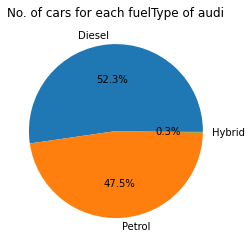

In [6]:
df["fuelType"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.ylabel("")
plt.title('No. of cars for each fuelType of audi', loc='left')
plt.show()

### The "Pie chart for fuelType column" is a bad visualization because <br> - Though we have 3 classes for the pie chart which is an ideal case but it is difficult to differentiate the part of 0.3% of Hybrid class.

# Find the percentage of unique values present in the 'fuelType' column

In [7]:
print(df["fuelType"].value_counts())

print(type(df["fuelType"].value_counts()))

df_fuelType = pd.DataFrame(df["fuelType"].value_counts())

display(df_fuelType.head())
print(df_fuelType.index)
print(df_fuelType.columns)

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64
<class 'pandas.core.series.Series'>


,fuelType
Diesel,5577
Petrol,5063
Hybrid,28


Index(['Diesel', 'Petrol', 'Hybrid'], dtype='object')
Index(['fuelType'], dtype='object')


In [8]:
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})

df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100

df_fuelType = df_fuelType.round(2)

# df_fuelType = np.round(df_fuelType, 2)

display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Diesel,5577,52.28
1,Petrol,5063,47.46
2,Hybrid,28,0.26


# Create a Barplot for the 'fuelType' column

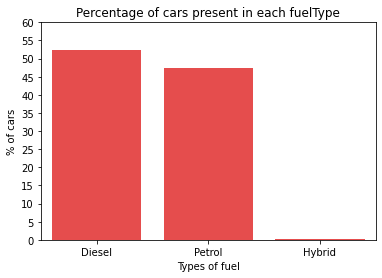

In [9]:
sns.barplot(x="fuelType", 
            y="% of cars", 
            data=df_fuelType, 
            color="red",
            alpha=0.8)

plt.xlabel("Types of fuel")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each fuelType")

plt.yticks(np.arange(0,61,5))

plt.show()

### The "Barplot for fuelType column" is a good visualization because <br> - Both x-axis, y-axis labels are appropriate and values of each class is clear. 

## We can reach the conclusion that barplot is better for the visualization of "fuelType" attribute. Because values of each class is more clear in barplot. 